In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [26]:
import sys
sys.path.append('../')

import constants as params

In [7]:
def data_viz(df_visualize):
    df_visualize = df_visualize.groupby(['transportation_issues']).sum().transpose()
    df_visualize.reset_index(drop=False,inplace=True)
    df_visualize.columns = ['sum_columns','no_issues','issues']

    df_visualize = df_visualize.melt(['sum_columns'])
    
    df_visualize['avg_value'] = 0

    for index, row in df_visualize.iterrows():
        if row['variable'] == 'no_issues':
            df_visualize.loc[index,'avg_value'] = row['value']/59375
        else:
            df_visualize.loc[index,'avg_value'] = row['value']/10197
    
    return df_visualize

In [8]:
prefix_data_raw = 'C:\\Users\\mohad\\OneDrive - University of South Florida\\Studies\\USF\\Humana-Github\\data\\rawdata\\original_pq_files\\'
prefix_data_inter = 'C:\\Users\\mohad\\OneDrive - University of South Florida\\Studies\\USF\\Humana-Github\\data\\intermediate\\'

pharmacy_file = "Pharm.pq"

In [15]:
pharm_df = pd.read_parquet(prefix_data_raw + pharmacy_file)

In [18]:
dependent_file = 'dependent.pq'
dep_df = pd.read_parquet(prefix_data_raw + dependent_file)

In [21]:
pharm_df = dep_df.merge(pharm_df, on =['person_id_syn'])

In [22]:
df_visualize = pd.concat([pharm_df[['rx_branded_pmpm_ct']],pharm_df[['transportation_issues']]],axis=1)
df_visualize_branded = data_viz(df_visualize)

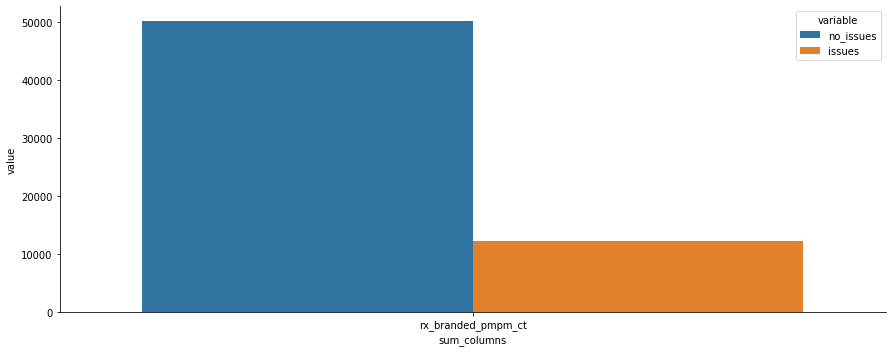

In [25]:
sns.catplot(x="sum_columns", y="value", hue="variable", kind="bar",height=5, 
            aspect=2.5, data=df_visualize_branded,legend_out=False)